In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [2]:
data_x, data_y = datasets.load_diabetes(return_X_y = True)
feature_labels = datasets.load_diabetes().feature_names

x_train = data_x[:-20]
x_test = data_x[-20:]

y_train = data_y[:-20]
y_test = data_y[-20:]

In [18]:
model = keras.Sequential([
    layers.Dense(units=4, activation='relu', input_shape=[10]),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=1)
])

In [19]:
model.compile(
    optimizer='adam',
    loss = 'mae'
)

In [20]:
early_stopping = EarlyStopping(
        min_delta = 0.01,
        patience = 20,
        restore_best_weights = True,
)

In [23]:
history = model.fit(
    x_train, y_train , 
    batch_size = 32,
    epochs = 500,
callbacks=[early_stopping])


Epoch 1/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6207
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6099
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6084
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6145
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6232
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6108
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6199
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6067
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6127
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6056
Epoch 11/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6132
Epoch 12/500
14/14 [==============================] - 0s 2ms/step - loss: 43.6206
Epoch 13/500
14/14 [=====

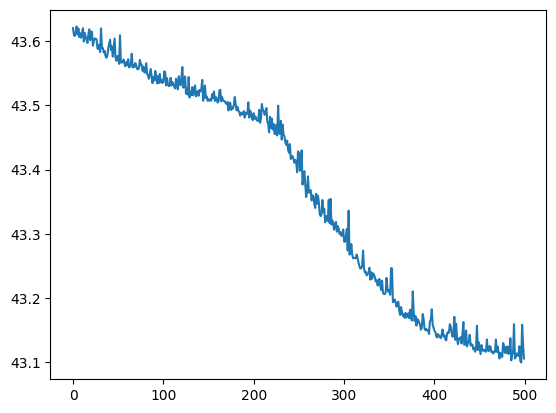

In [24]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();

In [25]:
# Predict on the test data
y_pred = model.predict(x_test)

# Optionally, you can evaluate the performance of your model using metrics like Mean Squared Error (MSE) or R-squared.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

1/1 [==============================] - 0s 109ms/step
Mean Squared Error: 1889.1044352810072
R-squared: 0.6089749800708304


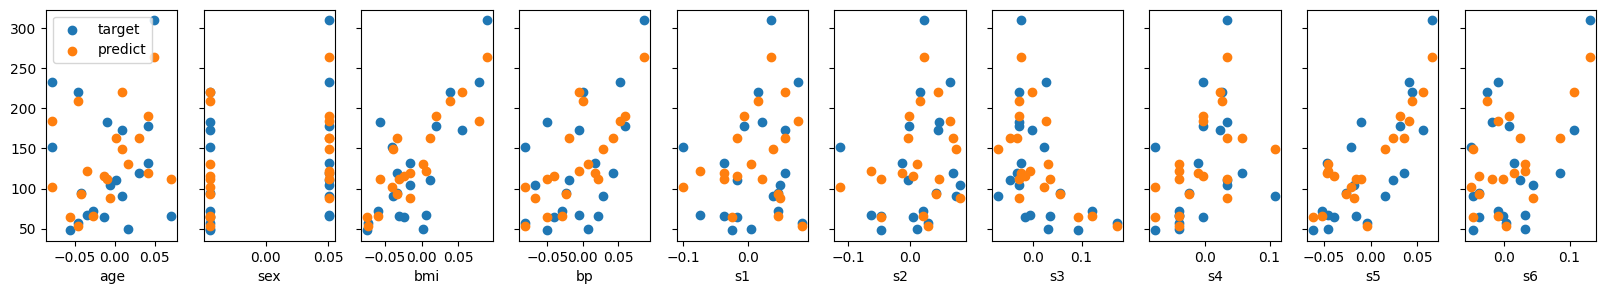

In [26]:
fig,ax=plt.subplots(1,10,figsize=(20,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(feature_labels[i])
    ax[i].scatter(x_test[:,i],y_pred, label = 'predict')
ax[0].legend();
#fig.suptitle("target versus prediction using z-score normalized model")
plt.show()